In [2]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame

/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


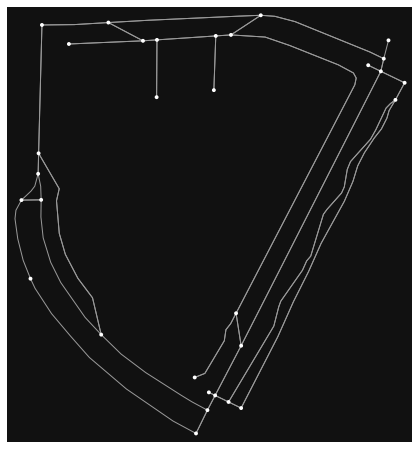

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [22]:
place_name = 'Бизнес-парк "Ростех-Сити"'
area = ox.geocode_to_gdf(place_name)
point = (55.82209792174043, 37.426770333466656)
G = ox.graph_from_place(place_name, network_type="all", buffer_dist = 50)
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)



#A = ox.geometries_from_point(point, tags = {'building': True}, dist=500)
#ox.plot_footprints(A)
